<a href="https://colab.research.google.com/github/listakurniawati/Indonesia-Sentiment-Classification-COVID-19-With-SVM/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import tensorflow as tf
import keras
from keras.preprocessing import text
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# **Upload Data**

In [ ]:
#upload data
data = pd.read_csv('https://raw.githubusercontent.com/listakurniawati/COVID-19-With-SVM/main/covid19_data.csv')

In [ ]:
data.columns

Index(['username', 'acctdesc', 'location', 'following', 'totaltweets',
       'usercreatedts', 'tweetcreatedts', 'retweetcount', 'followers', 'text'],
      dtype='object')

In [ ]:
#drop kolom yang tidak dibutuhkan
data.drop(columns = ['acctdesc', 'location', 
                     'following', 'totaltweets', 
                     'usercreatedts', 'tweetcreatedts', 
                     'retweetcount', 'followers'])

,username,text
0,FatihReborn,Sehatnya rakyat Indonesia tentu harus mencakup...
1,dizyyyyyyyyyy,Sama seperti kita yang ingin pandemi segera be...
2,ilupyusayanggg,"Dengan dukung satu sama lain, masa-masa sepert..."
3,PMRLangkawi1,Lindungi orang yang kita sayang dengan vaksin....
4,anas_erindra,Pakar kesehatan masyarakat mengingatkan vaksin...
...,...,...
8446,Mumun69Mumun,Semoga bisa kembali normal\r\n\r\n#Vaksin\r\n#...
8447,Mumun69Mumun,Terimakasih pakde \r\n\r\n#Vaksin\r\n#Pandemi ...
8448,tsutjia,Selandia Baru akan berikan vaksin gratis bagi ...
8449,pmrnabawan,COVID-19 boleh dicegah menggunakan vaksin. \r\...


In [ ]:
#total tweets yang akan digunakan
print("Total tweets: %d" %data.shape[0])

Total tweets: 8451


# ***Pre-processing***

In [ ]:
dt = pd.read_csv('https://raw.githubusercontent.com/listakurniawati/COVID-19-With-SVM/main/FIXtweetcovid19.csv?token=ARCQD7CAWBILPO5FVX3TIWLAXMS52')
dt

,text,label
0,Sehatnya rakyat Indonesia tentu harus mencakup...,1
1,Sama seperti kita yang ingin pandemi segera be...,1
2,"Dengan dukung satu sama lain, masa-masa sepert...",1
3,Lindungi orang yang kita sayang dengan vaksin....,1
4,Pakar kesehatan masyarakat mengingatkan vaksin...,1
...,...,...
8392,Semoga bisa kembali normal\n \n #Vaksin\n #Pan...,1
8393,Terimakasih pakde \n \n #Vaksin\n #Pandemi \n ...,1
8394,Selandia Baru akan berikan vaksin gratis bagi ...,1
8395,COVID-19 boleh dicegah menggunakan vaksin. \n ...,1


In [ ]:
dt.head()

,text,label
0,Sehatnya rakyat Indonesia tentu harus mencakup...,1
1,Sama seperti kita yang ingin pandemi segera be...,1
2,"Dengan dukung satu sama lain, masa-masa sepert...",1
3,Lindungi orang yang kita sayang dengan vaksin....,1
4,Pakar kesehatan masyarakat mengingatkan vaksin...,1


In [ ]:
df = dt.drop_duplicates(subset=['text'], keep='last', inplace=False)
df.text = df.text.astype(str)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,text,label
1998,"Vaksin Gratis COVID-19, Penolakan Masyarakat T...",1
2285,Presiden Jokowi telah menetapkan vaksin gratis...,1
2286,Presiden Jokowi telah menetapkan vaksin gratis...,1
2287,Presiden Jokowi telah menetapkan vaksin gratis...,1
2288,Presiden Jokowi telah menetapkan vaksin gratis...,1
...,...,...
8391,Perdana Menteri: Kamboja Bukan Tempat Sampah d...,1
8392,Semoga bisa kembali normal\n \n #Vaksin\n #Pan...,1
8393,Terimakasih pakde \n \n #Vaksin\n #Pandemi \n ...,1
8395,COVID-19 boleh dicegah menggunakan vaksin. \n ...,1


In [ ]:
df_ = df.reset_index()

In [ ]:
dfnew = df_.drop(['index'], axis=1)
dfnew

,text,label
0,"Vaksin Gratis COVID-19, Penolakan Masyarakat T...",1
1,Presiden Jokowi telah menetapkan vaksin gratis...,1
2,Presiden Jokowi telah menetapkan vaksin gratis...,1
3,Presiden Jokowi telah menetapkan vaksin gratis...,1
4,Presiden Jokowi telah menetapkan vaksin gratis...,1
...,...,...
1272,Perdana Menteri: Kamboja Bukan Tempat Sampah d...,1
1273,Semoga bisa kembali normal\n \n #Vaksin\n #Pan...,1
1274,Terimakasih pakde \n \n #Vaksin\n #Pandemi \n ...,1
1275,COVID-19 boleh dicegah menggunakan vaksin. \n ...,1


In [ ]:
dfnew['label'].value_counts()

 1    1200
-1      77
Name: label, dtype: int64

Text(0.5, 1.0, 'Diagram Bar Data Analisis Sentimen')

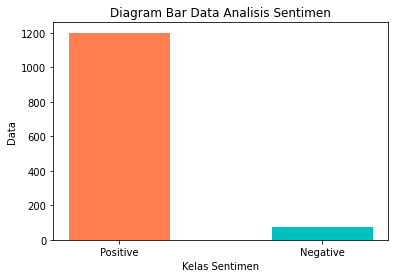

In [ ]:
labels = ['Positive','Negative']
Category1 = [1200, 77]
plt.bar(labels, Category1, tick_label=labels, width=0.5, color=['coral', 'c'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar Data Analisis Sentimen')

In [ ]:
dfnew['label'] = dfnew['label'].replace(-1,0)

In [ ]:
#PEMBERSIHAN(CLEANING DATA)
stopwords = pd.read_csv("https://raw.githubusercontent.com/listakurniawati/COVID-19-With-SVM/main/stopwords_id.csv?token=ARCQD7EZ55J4TUTAWYYLYOTAX3FTW")
stopwords = np.append(stopwords, "rt")

def clean_text(tweet):
    # Convert to lower case
    tweet = tweet.lower()
    # Clean www.* or https?://*
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet)
    # Clean @username
    tweet = re.sub('@[^\s]+','',tweet)
    #Remove punctuation
    tweet = re.sub(r'[^\w\s]',' ', tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #Clean number
    tweet = re.sub(r'[\d-]', '', tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    #trim
    tweet = tweet.strip('\'"')
    # Clean per Words
    words = tweet.split()
    tokens=[]
    for ww in words:
        #split repeated word
        for w in re.split(r'[-/\s]\s*', ww):
            #replace two or more with two occurrences
            pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
            w = pattern.sub(r"\1\1", w)
            #strip punctuation
            w = w.strip('\'"?,.')
            #check if the word cosists of two or more alphabets
            val = re.search(r"^[a-zA-Z][a-zA-Z][a-zA-Z]*$", w)
            #add tokens
            if(w in stopwords or val is None):
                continue
            else:
                tokens.append(w.lower())
    
    tweet = " ".join(tokens)
    return tweet


In [ ]:
dfnew['text'] = dfnew['text'].map(lambda x: clean_text(x))
dfnew = dfnew[dfnew['text'].apply(lambda x: len(x.split()) >=1)]
dfnew

,text,label
0,vaksin gratis covid penolakan masyarakat diant...,1
1,presiden jokowi menetapkan vaksin gratis rakya...,1
2,presiden jokowi menetapkan vaksin gratis masya...,1
3,presiden jokowi menetapkan vaksin gratis rakya...,1
4,presiden jokowi menetapkan vaksin gratis rakya...,1
...,...,...
1272,perdana menteri kamboja sampah uji coba vaksin...,1
1273,semoga normal vaksin pandemi indonesia virus i...,1
1274,terimakasih pakde vaksin pandemi indonesia vir...,1
1275,covid dicegah vaksin vaksin berfungsi badan ko...,1


In [ ]:
test = np.array(dfnew['text'])
test

array(['vaksin gratis covid penolakan masyarakat diantisipasi via beritaterkini beritanasional vaksinuntukkita penolakanvaksin vaksingratis ingatpesanibu pakaimasker',
       'presiden jokowi menetapkan vaksin gratis rakyat ayo vaksinasi vaksinuntukkita vaksingratisuntukrakyat jokowi vaksingratis vaksinaman vaksindatangtetapjagam',
       'presiden jokowi menetapkan vaksin gratis masyarakat apresiasi pemerintah terbaik vaksinuntukkita vaksingratisuntukrakyat jokowi vaksingratis vaksinaman vaksindatangtetapjagam',
       ...,
       'terimakasih pakde vaksin pandemi indonesia virus indonesiakuat',
       'covid dicegah vaksin vaksin berfungsi badan komunikasikita vaksincovid jabatanpenerangan',
       'selandia vaksin gratis juta warganya penduduk negara tetangga selandia membeli vaksin perusahaan farmasi berbeda kelompok populasi vaksin cocok vaksin jacindaardern covid'],
      dtype=object)

In [ ]:
test[0]

'vaksin gratis covid penolakan masyarakat diantisipasi via beritaterkini beritanasional vaksinuntukkita penolakanvaksin vaksingratis ingatpesanibu pakaimasker'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
text_tf = tf.fit_transform(dfnew['text'])

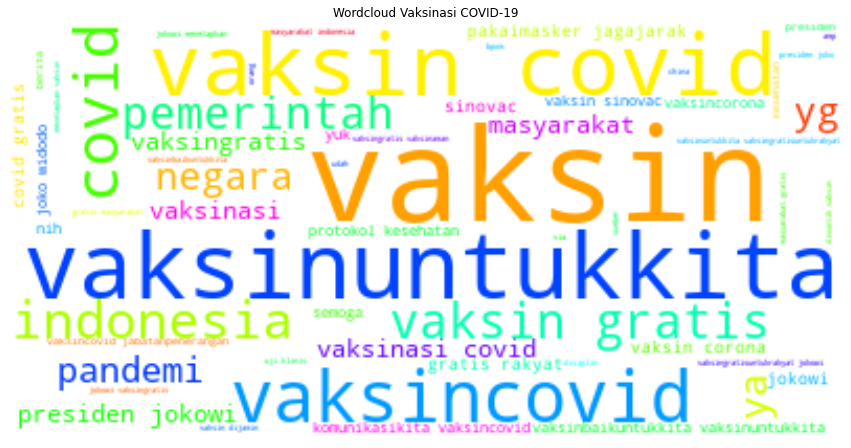

In [ ]:
from wordcloud import  WordCloud, STOPWORDS, ImageColorGenerator

text_ = " ".join(review for review in test)

# Generate the image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100, colormap='gist_rainbow_r').generate(text_)
 
# visualize the image
fig=plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud Vaksinasi COVID-19')
plt.show()

# **Model SVM**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(text_tf, dfnew['label'], test_size=0.2, random_state=42)

Text(0, 0.5, 'Cross-Validated Accuracy')

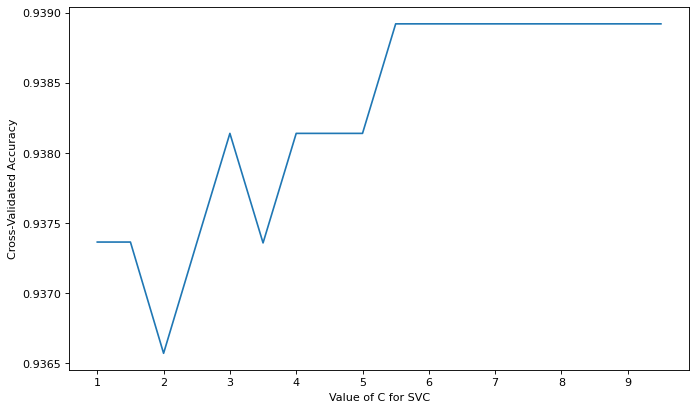

In [ ]:
C_range=list(np.arange(1,10,0.5))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, text_tf, dfnew['label'], cv=10, scoring='accuracy')
    acc_score.append(scores.mean())

C_values=list(np.arange(1,10,0.5))
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(C_values,acc_score)
plt.xticks(np.arange(1,10,1))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

Text(0, 0.5, 'Cross-Validated Accuracy')

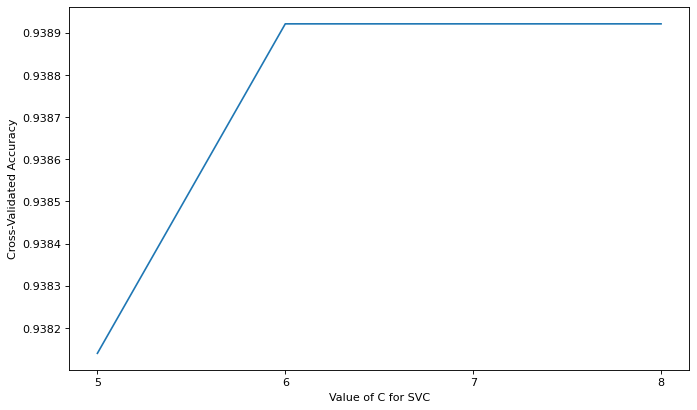

In [ ]:
C_range=list(np.arange(5,9,1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, text_tf, dfnew['label'], cv=10, scoring='accuracy')
    acc_score.append(scores.mean())

C_values=list(np.arange(5,9,1))
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(C_values,acc_score)
plt.xticks(np.arange(5,9,1))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

Text(0, 0.5, 'Cross-Validated Accuracy')

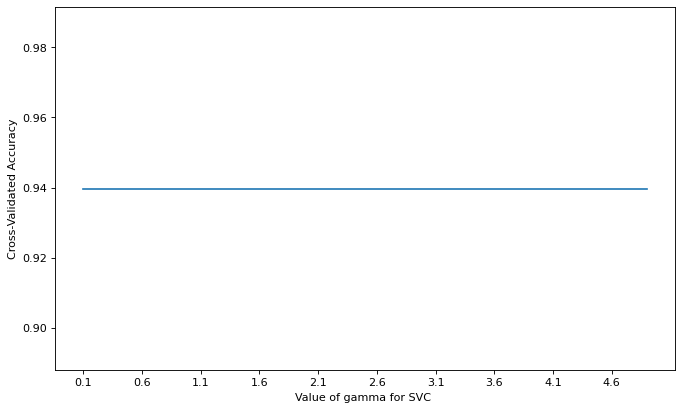

In [ ]:
gamma_range=list(np.arange(0.1,5,0.1))
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, text_tf, dfnew['label'], cv=10, scoring='accuracy')
    acc_score.append(scores.mean())

figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.1,5,0.5))
plt.ylabel('Cross-Validated Accuracy')

Text(0, 0.5, 'Cross-Validated Accuracy')

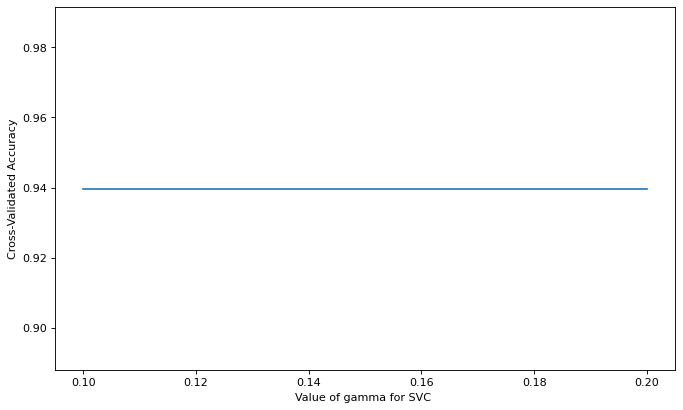

In [ ]:
gamma_range=list(np.arange(0.1,0.3,0.1))
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, text_tf, dfnew['label'], cv=10, scoring='accuracy')
    acc_score.append(scores.mean())

figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

Text(0, 0.5, 'Cross-Validated Accuracy')

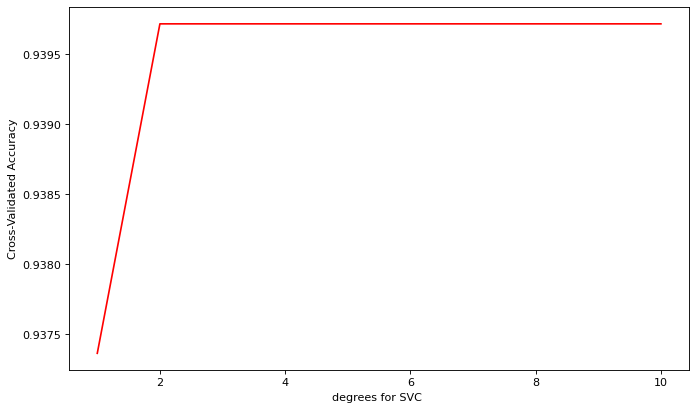

In [ ]:
degree=[1,2,3,4,5,6,7,8,9,10]
acc_score=[]
for d in degree:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, text_tf, dfnew['label'], cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
    
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(degree,acc_score,color='r')
plt.xlabel('degrees for SVC ')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
svm_model= SVC()
tuned_parameters = {'C': np.arange(6,9,1),
                    'kernel': ['linear','rbf','poly'],
                    'gamma': np.arange(0.1,5,0.5),
                    'degree': [2,3,4,5]} 
model_svm = GridSearchCV(svm_model, tuned_parameters, cv = 10, scoring = 'accuracy', return_train_score = True)

In [ ]:
model_svm.fit(x_train, y_train)
print("Akurasi terbaik: %f menggunakan %s" % (model_svm.best_score_, model_svm.best_params_))
means = model_svm.cv_results_['mean_test_score']
stds = model_svm.cv_results_['std_test_score']
params = model_svm.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Akurasi: %f (%f) dengan: %r" % (mean, stdev, param))

Akurasi terbaik: 0.946126 menggunakan {'C': 6, 'degree': 2, 'gamma': 0.6, 'kernel': 'rbf'}
Akurasi: 0.945146 (0.007880) dengan: {'C': 6, 'degree': 2, 'gamma': 0.1, 'kernel': 'linear'}
Akurasi: 0.942214 (0.002927) dengan: {'C': 6, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
Akurasi: 0.942214 (0.002927) dengan: {'C': 6, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
Akurasi: 0.945146 (0.007880) dengan: {'C': 6, 'degree': 2, 'gamma': 0.6, 'kernel': 'linear'}
Akurasi: 0.946126 (0.004951) dengan: {'C': 6, 'degree': 2, 'gamma': 0.6, 'kernel': 'rbf'}
Akurasi: 0.946126 (0.004951) dengan: {'C': 6, 'degree': 2, 'gamma': 0.6, 'kernel': 'poly'}
Akurasi: 0.945146 (0.007880) dengan: {'C': 6, 'degree': 2, 'gamma': 1.1, 'kernel': 'linear'}
Akurasi: 0.946126 (0.004951) dengan: {'C': 6, 'degree': 2, 'gamma': 1.1, 'kernel': 'rbf'}
Akurasi: 0.946126 (0.004951) dengan: {'C': 6, 'degree': 2, 'gamma': 1.1, 'kernel': 'poly'}
Akurasi: 0.945146 (0.007880) dengan: {'C': 6, 'degree': 2, 'gamma': 1.6, 'kernel': 'lin

In [ ]:
print(model_svm.best_score_)

0.946126023224824


In [ ]:
print(model_svm.best_params_)

{'C': 6, 'degree': 2, 'gamma': 0.6, 'kernel': 'rbf'}


In [ ]:
y_pred= model_svm.predict(x_test)
print('Akurasi:',metrics.accuracy_score(y_pred,y_test))
print('Presisi:',metrics.precision_score(y_pred,y_test))
print('Recall:',metrics.recall_score(y_pred,y_test))

Akurasi: 0.94140625
Presisi: 1.0
Recall: 0.9407114624505929


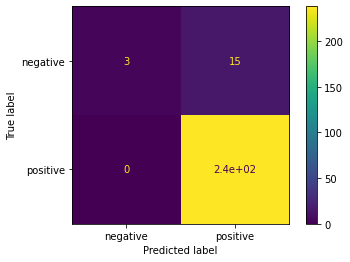

In [ ]:
cm_svm = confusion_matrix(y_test, y_pred)
cm_svm

cm_display = ConfusionMatrixDisplay(cm_svm, display_labels= ['negative','positive']).plot()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(3, 15, 0, 238)

# **Cek Apakah Model Overfitting**

In [ ]:
svm_model_val= SVC()
tuned_parameters_val = {'C': [5.0], 'degree': [2], 'gamma': [0.30000000000000004], 'kernel': ['rbf']}
model_svm_val = GridSearchCV(svm_model_val, tuned_parameters_val, cv=10,scoring='accuracy',return_train_score=True)

In [ ]:
scores = cross_val_score(model_svm_val, x_train, y_train, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.95 (+/- 0.01)


In [ ]:
model_svm_val.fit(x_train,y_train)
model_svm_val.cv_results_

{'mean_fit_time': array([0.08007178]),
 'mean_score_time': array([0.00817471]),
 'mean_test_score': array([0.94710642]),
 'mean_train_score': array([1.]),
 'param_C': masked_array(data=[5.0],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_degree': masked_array(data=[2],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0.30000000000000004],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 5.0,
   'degree': 2,
   'gamma': 0.30000000000000004,
   'kernel': 'rbf'}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.95145631]),
 'split0_train_score': array([1.]),
 'split1_test_score': array([0.96078431]),
 'split1_train_score': array([1.]),
 'split2_test_score': array([0.94117647]),
 'split